### Imports

In [1]:
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

### Ejercicio 1

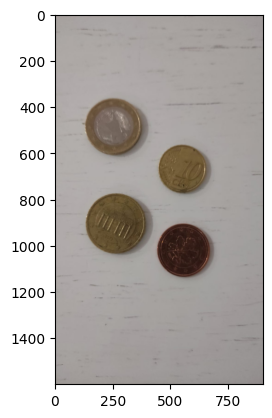

In [2]:
img = cv2.imread('p1/monedas1.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

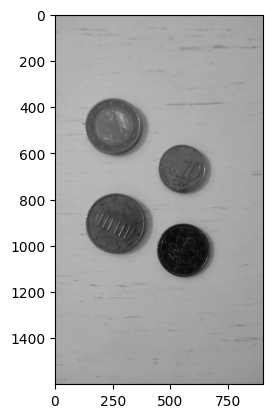

In [3]:
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gimg, cmap='gray')

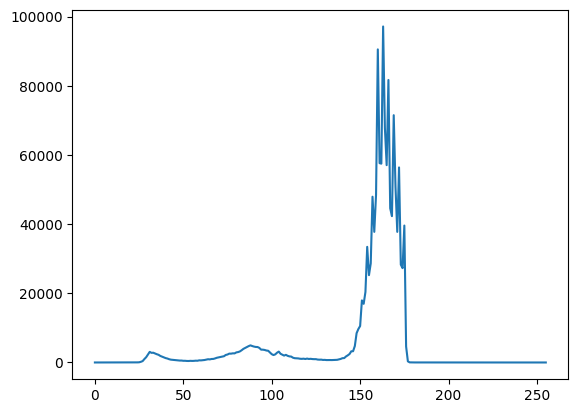

In [4]:
hist = cv2.calcHist([gimg], [0], None, [256], [0, 256])
plt.plot(hist)

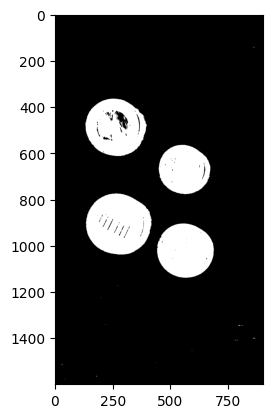

In [5]:
_, thimg = cv2.threshold(gimg, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thimg, cmap='gray')

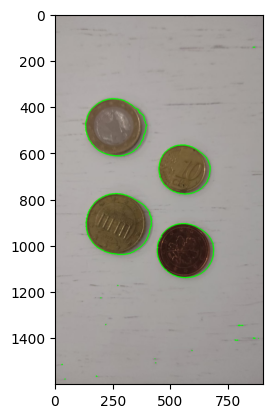

In [6]:
contours, hierarchy = cv2.findContours(thimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(cv2.cvtColor(cv2.drawContours(img, contours, -1, (0, 255, 0), 3), cv2.COLOR_BGR2RGB))


In [7]:
# *=> consts
SIZE_GAP = .04
CTRL_COIN = 1
COIN_SIZE = { # diametro (mm)
    .01: 16.26,
    .02: 18.75,
    .05: 21.25,
    .1: 19.75,
    .2: 22.25,
    .5: 24.25,
    1: 23.25,
    2: 25.75
}

click_pos = None

tmp_img = np.array(img)
        

def test_pos(pos, contours):
    """Test if a position is inside a contour"""
    global ctrl_cont

    for c in contours:
        if cv2.pointPolygonTest(c, pos, False) >=0:
           ctrl_cont = c
           return True
        
    return False


def click(event, x, y, flags, params):
    """Click event, shows clicked point & give click position"""
    global click_pos
    if event == cv2.EVENT_LBUTTONUP:
        tmp_img = np.array(img)
        cv2.circle(tmp_img, (x,y), 10, (255, 0, 0), -1)
        cv2.imshow('Monedas', tmp_img)
        click_pos = (x, y)



# Ask user to click on a control coin until is a valid position (inside a contour)
while click_pos == None or not test_pos(click_pos, contours):
    cv2.namedWindow("Monedas")
    cv2.setMouseCallback('Monedas', click)

    while True:
        cv2.imshow('Monedas', cv2.drawContours(tmp_img, contours, -1, (0, 255, 0), 3))
        if cv2.waitKey(0) & 0xFF == 27: break

    cv2.destroyAllWindows()
    cv2.waitKey(1)


# Calculates control radius & proportionality constant for control contour
_, ctrl_rad = cv2.minEnclosingCircle(ctrl_cont)
kprop = COIN_SIZE[CTRL_COIN]/ctrl_rad


# Calculates value for the sum
summ = 0
for c in contours:
    if cv2.contourArea(c) > 10:
        _, radius = cv2.minEnclosingCircle(c)
        
        for item in COIN_SIZE.items():
            if item[1]*(1-SIZE_GAP) <= radius*kprop <= item[1]*(1+SIZE_GAP):
                summ+=item[0]
                break

print(f'Valor final: {summ} €')

2024-10-12 20:29:45.933 python[18582:602816] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-12 20:29:45.933 python[18582:602816] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


Valor final: 1.65 €


##### Aclaración

La precisión a la hora de acertar la moneda, es muy dependiente del gap usado, en este caso se ha ajustado, usando como referencia la foto proporcionada por el profesor, y tomando el gap más alto que de el resultado correcto (se ha ajustado a mano), dando como resultado un **gap** de **0.04**, es decir, un **4%**.  
Al pasar a una imagen real (sin solapamientos), ha resultado en un valor adecuado.

### Ejercicio 2

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


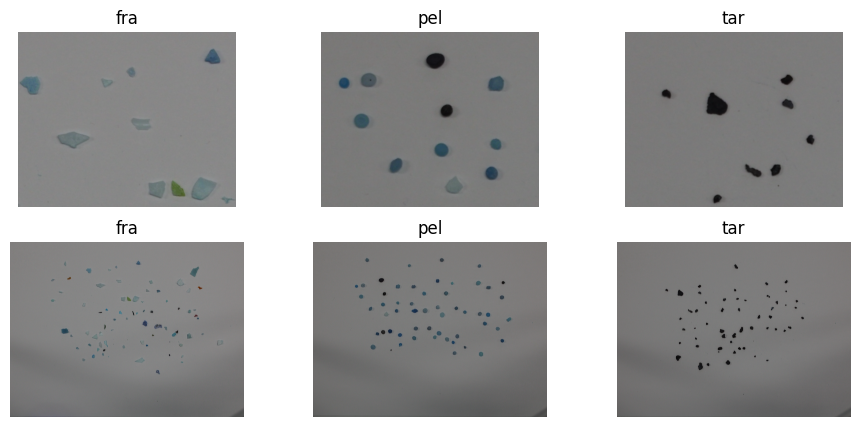

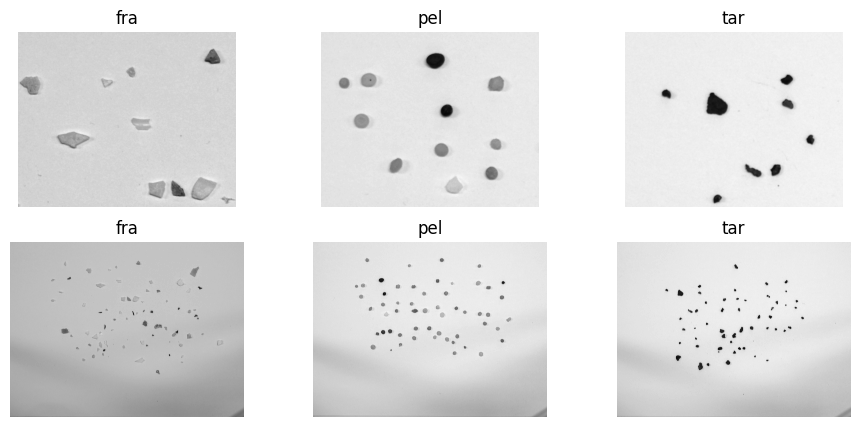

In [8]:
imgs = {
    "sm":{
        "fra": cv2.imread('p2/FRA.png'),
        "pel": cv2.imread('p2/PEl.png'),
        "tar": cv2.imread('p2/TAR.png')
    },
    "bg":{
        "fra": cv2.imread('p2/fragment-03-olympus-10-01-2020.JPG'),
        "pel": cv2.imread('p2/pellet-03-olympus-10-01-2020.JPG'),
        "tar": cv2.imread('p2/tar-03-olympus-10-01-2020.JPG')
    }
}


def applyToAllImgs(data,f):
    tmp = {
        "sm": {
            "fra": None,
            "pel": None,
            "tar": None
        },
        "bg":{
            "fra": None,
            "pel": None,
            "tar": None
        },
    }

    for k in data.keys():
        for key in data[k].keys():
            tmp[k][key] = f(data[k][key])

    return tmp

def showAll(imgs, cmap=None):
    plt.figure(figsize=(15, 5))

    for (idx, elm) in enumerate(imgs["sm"].keys()):
        plt.subplot(2, 4, idx+1), plt.imshow(imgs["sm"][elm], cmap=cmap)
        plt.title(elm)
        plt.axis('off')

    for (idx, elm) in enumerate(imgs["bg"].keys()):
        plt.subplot(2,4, idx+5), plt.imshow(imgs["bg"][elm], cmap=cmap)
        plt.title(elm)
        plt.axis('off')

def plotAll(imgs):
    plt.figure(figsize=(20, 8))

    for (idx, elm) in enumerate(imgs["sm"].keys()):
        plt.subplot(2, 4, idx+1), plt.plot(imgs["sm"][elm])
        plt.title(elm)

    for (idx, elm) in enumerate(imgs["bg"].keys()):
        plt.subplot(2,4, idx+5), plt.plot(imgs["bg"][elm])
        plt.title(elm)


showAll(imgs)
gimgs = applyToAllImgs(imgs, lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2GRAY))
showAll(gimgs, cmap='gray')

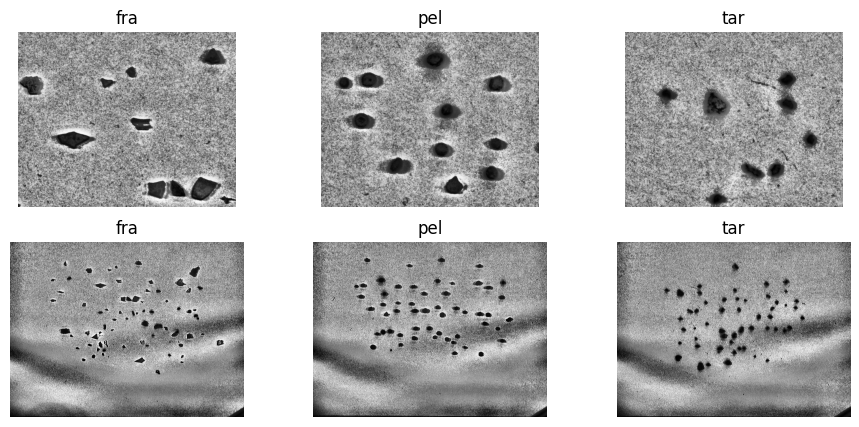

In [9]:
clahe = cv2.createCLAHE()
eimgs = applyToAllImgs(gimgs, lambda x: clahe.apply(x))
#eimgs = applyToAllImgs(gimgs, lambda x: cv2.equalizeHist(x))
showAll(eimgs, cmap='gray')

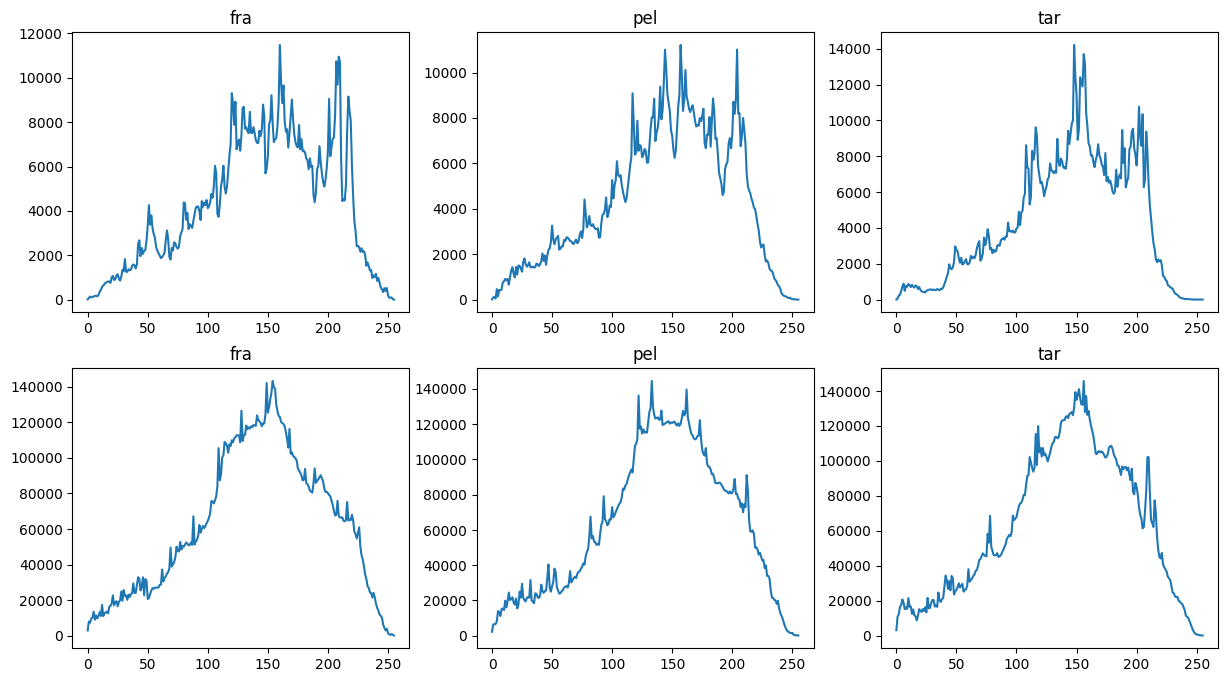

In [10]:
hists = applyToAllImgs(eimgs, lambda x: cv2.calcHist([x], [0], None, [256], [0, 256]))
plotAll(hists)

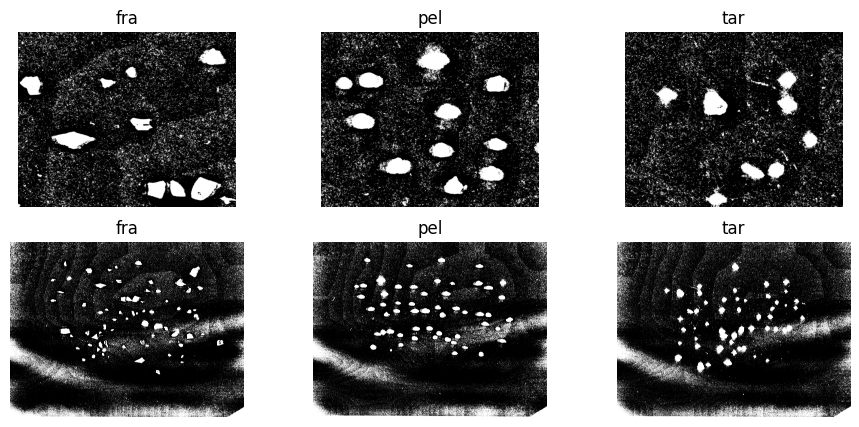

In [11]:

thimgs = applyToAllImgs(eimgs, lambda x: cv2.threshold(x, 90, 100, cv2.THRESH_BINARY_INV )[1])
# thimgs = applyToAllImgs(eimgs, lambda x: cv2.adaptiveThreshold(x, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3))
showAll(thimgs, cmap='gray')

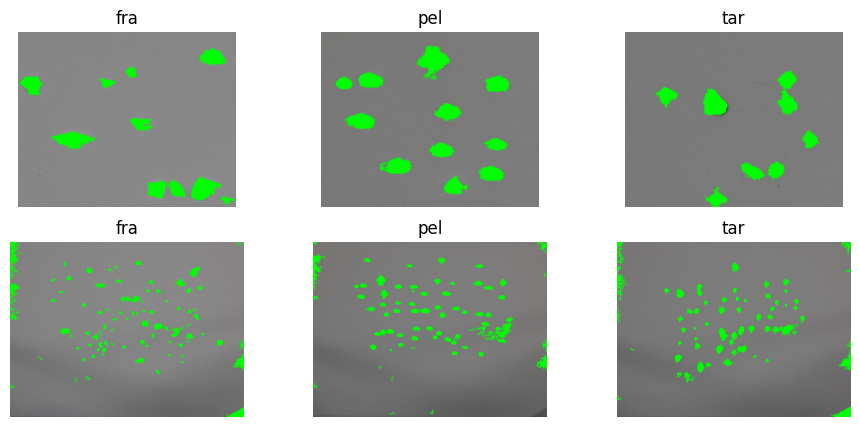

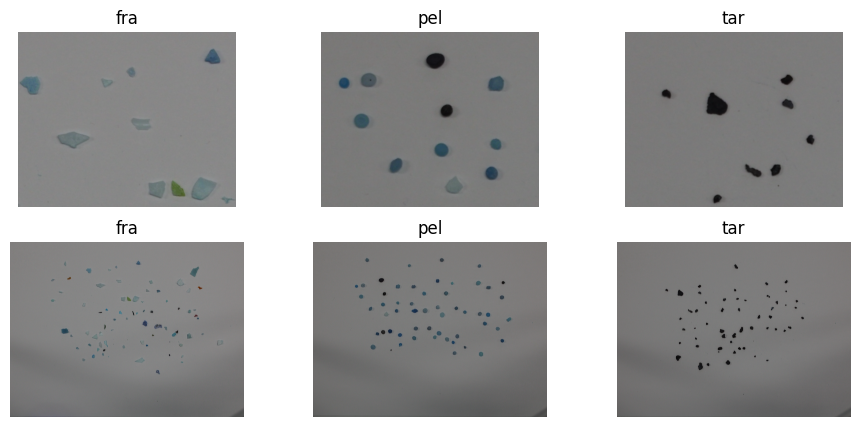

In [12]:

def filterContours(contours):
    conts = []
    for c in contours:
        if 1200 < cv2.contourArea(c) < 60000:
            conts.append(c)

    return conts

cont_imgs = applyToAllImgs(imgs, lambda x: np.array(x))
contours = applyToAllImgs(thimgs, lambda x: cv2.findContours(x, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0])

for k in contours.keys():
    for key in contours[k].keys():
        contours[k][key] = filterContours(contours[k][key])

for k in contours.keys():
    for key in contours[k].keys():
        cv2.drawContours(cont_imgs[k][key], contours[k][key], -1, (0, 255, 0), -1)

showAll(cont_imgs)
showAll(imgs)

In [13]:
import random
from collections import namedtuple

Type = namedtuple("Type", "idx name")
Tester = namedtuple('Tester', 'type test')
Entry = namedtuple('Entry', 'type img cont')

types = [Type(0, 'FRA'), Type(1, 'PEL'), Type(2, 'TAR')]


class Classifier:

    SYSTEM_ONE = 'ONE'
    SYSTEM_MULTI = 'MULTI'

    def __init__(self, name='Classifier', system=SYSTEM_MULTI,
                 collisions_resolver=lambda tests, results:  tests[results.argmax()]):
        self.name = name
        self.system = system

        self.tester = None
        self.__testers = []
        self.collisions_resolver = collisions_resolver

    
    @property
    def name(self): return self.__name
    @name.setter
    def name(self, name): self.__name = name

    @property
    def tester(self): return self.__tester
    @tester.setter
    def tester(self, tester): self.__tester = tester

    @property
    def system(self): return self.__system
    @system.setter
    def system(self, system):
        if system != self.SYSTEM_ONE and system != self.SYSTEM_MULTI : raise ValueError('Incorrect system option')
        self.__system = system

    @property
    def collisions_resolver(self): return self.__collisions_resolver
    @collisions_resolver.setter
    def collisions_resolver(self, collisions_resolver): self.__collisions_resolver = collisions_resolver

    def add_tester(self, tester):
        if type(tester) != Tester: raise TypeError('The tester must be a type Tester')
        self.__testers.append(tester)

    def delete_tester(self, val):
        if type(val) == str:
            for idx, tester in enumerate(self.__testers):
                if tester.name == val:
                    del self.__testers[idx]
                    return

        else: del self.__testers[val] 

    def show(self): 
        return {'system': self.system, 'name': self.name, 'test': self.tester, 'tests': self.__testers }
    
    def __call__(self, entry):
        if type(entry) != Entry: raise TypeError('The entry must be a type Entry')
    
        if self.system == self.SYSTEM_ONE: return self.tester(entry)
        
        results = map(lambda f: f(entry) ,self.__testers)

        return self.__collisions_resolver(self.__testers, results), results

#### Vamos a hacer un pequeño análisis de los datos

Sabemos que se nos marcan algunos puntos que en realidad no se tratan de verdaderas muestras, quizás mas adelante podamos filtrarlos cuando descubramos como clasificarlos. Por el momento, vamos a comprobar cuantos elementos tenemos de cada conjunto. Y seguramente equiparar los conjuntos, de tal forma que extraigamos de forma aleatoria subconjuntos de tal forma que todos queden igual.

In [14]:
cjtos = contours["bg"]
print("Elementos de cada conjunto sin equiparar: ")
for k in cjtos.keys(): print(f"\t{k}: {len(cjtos[k])}")

# Normalizar los conjuntos
#  > haremos que todos los cjtos tengan la misma cantidad de elementos (o sea que tomaremos el que menor cantidad tiene)
min_cjtos = min(*[len(val) for val in cjtos.values()])

cjtos_equ = dict()
for k in cjtos.keys(): cjtos_equ[k] = random.sample(cjtos[k], min_cjtos)

print("\nElementos de cada conjunto equiparados: ")
for k in cjtos_equ.keys(): print(f"\t{k}: {len(cjtos_equ[k])}")

Elementos de cada conjunto sin equiparar: 
	fra: 91
	pel: 77
	tar: 66

Elementos de cada conjunto equiparados: 
	fra: 66
	pel: 66
	tar: 66


In [22]:
imgs_equ = imgs["bg"]

# como el clasificador no tiene memoria podríamos tener las muestras ordenadas por tipo, sin embargo, por si en el futuro usamos
# otro tipo de clasificador las mezclaré.
entries = [Entry(types[idx], imgs_equ[key], c) for idx, key in enumerate(cjtos_equ.keys()) for c in cjtos_equ[key]]
random.shuffle(entries)

### Funciones para el análisis del clasificador

In [23]:
def classifier_analysis(classifier, entries):
    entries_types = [entry.type.idx for entry in entries]
    results = [classifier(entry).idx for entry in entries]

    return {
            'accuracy': accuracy_score(entries_types, results),
            'precision': precision_score(entries_types, results, average='weighted'),
            'recall': recall_score(entries_types, results, average='weighted'),
            'f1_score': f1_score(entries_types, results, average='weighted'),
            'conf_matrix': confusion_matrix(entries_types, results)
            }

def classifier_analisis_plot(data):

    print('# Datos del clasificador')
    print(f"\tAccuracy: {data['accuracy']:.2f}")
    print(f"\tPrecision: {data['precision']:.2f}")
    print(f"\tRecall: {data['recall']:.2f}")
    print(f"\tF1 Score: {data['f1_score']:.2f}")

    plt.figure(figsize=(10,10))
    sns.set(font_scale=1.75)
    sns.set(font_scale=3.0)

    ax = sns.heatmap(data["conf_matrix"], annot=True, fmt='d', cbar=False, cmap='flag')
    label_font =  {'size': '25'}
    ax.set_xlabel("Predicted", labelpad=-.75, fontdict=label_font)
    ax.set_ylabel("Tagged", labelpad=-20, fontdict=label_font)

#### Extraigamos patrones de los datos

Antes de crear el clasificador perse, vamos a intentar buscar patrones de los datos, para ello, sacaremos varias posibles medidas conocidas, y vamos a ver si los diferentes tipos de muestras tienen, a groso modo, algún patrón característico.

In [24]:
import math

def patron_analysis(conts_group):

    extent = np.array([])
    solidity = np.array([])
    equi_diameter = np.array([])
    per_div_area = np.array([])

    per_div_rad = np.array([])
    equi_diameter_div_rad = np.array([])

    for c in conts_group:
        x,y,w,h = cv2.boundingRect(c)
        area = cv2.contourArea(c)
        rect_area = w*h
        hull = cv2.convexHull(c)
        hull_area = cv2.contourArea(hull)
        perimeter = cv2.arcLength(c,True)
        (x,y),radius = cv2.minEnclosingCircle(c)

        extent = np.append(extent, [float(area)/rect_area])
        solidity = np.append(solidity,  [float(area)/hull_area])
        equi_diameter = np.append(equi_diameter,  [np.sqrt(4*area/np.pi)])
        per_div_area = np.append(per_div_area, [ perimeter/area])
        per_div_rad = np.append(per_div_rad, [perimeter/radius])
        equi_diameter_div_rad = np.append(equi_diameter_div_rad, [equi_diameter/radius])


    return {'extent': np.median(extent),
           'solidity': np.median(solidity),
            'equi_diameter': np.median(equi_diameter),
            'per_div_area': np.median(per_div_area),

            'per_div_rad':np.median(per_div_rad),
            'equi_diameter_div_rad': np.median(equi_diameter_div_rad),
            }
    
for key in cjtos_equ.keys():

    print(f"\n# {key}")
    results = patron_analysis(cjtos_equ[key])

    for param in results.keys():
        print(f"\t{param}: {results[param]:.2f}")


# fra
	extent: 0.55
	solidity: 0.81
	equi_diameter: 65.19
	per_div_area: 0.12
	per_div_rad: 8.99
	equi_diameter_div_rad: 1.15

# pel
	extent: 0.56
	solidity: 0.80
	equi_diameter: 101.73
	per_div_area: 0.10
	per_div_rad: 10.05
	equi_diameter_div_rad: 1.21

# tar
	extent: 0.48
	solidity: 0.71
	equi_diameter: 95.02
	per_div_area: 0.15
	per_div_rad: 15.24
	equi_diameter_div_rad: 1.31


#### Creación del clasificador

In [27]:
def my_clasifier(entry):

    c = entry.cont

    x,y,w,h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    rect_area = w*h
    hull = cv2.convexHull(c)
    hull_area = cv2.contourArea(hull)
    perimeter = cv2.arcLength(c,True)
    (x,y),radius = cv2.minEnclosingCircle(c)

    extent = float(area)/rect_area
    solidity = float(area)/hull_area
    equi_diameter = np.sqrt(4*area/np.pi)
    per_div_area = perimeter/area

    per_div_rad = perimeter/radius
    equi_diameter_div_rad = float(equi_diameter)/radius

    # types = [Type(0, 'UNKNOWN'), Type(1, 'FRA'), Type(2, 'PEL'), Type(3, 'TAR')]

    if equi_diameter < 70: return types[0]
    elif per_div_rad > 11: return types[2]
    else: return types[1]
    

classifier = Classifier()
classifier.system = Classifier.SYSTEM_ONE
classifier.tester = my_clasifier
# classifier.tester = lambda x: random.choice(types)

#### Análisis del clasificador

# Datos del clasificador
	Accuracy: 0.60
	Precision: 0.60
	Recall: 0.60
	F1 Score: 0.60


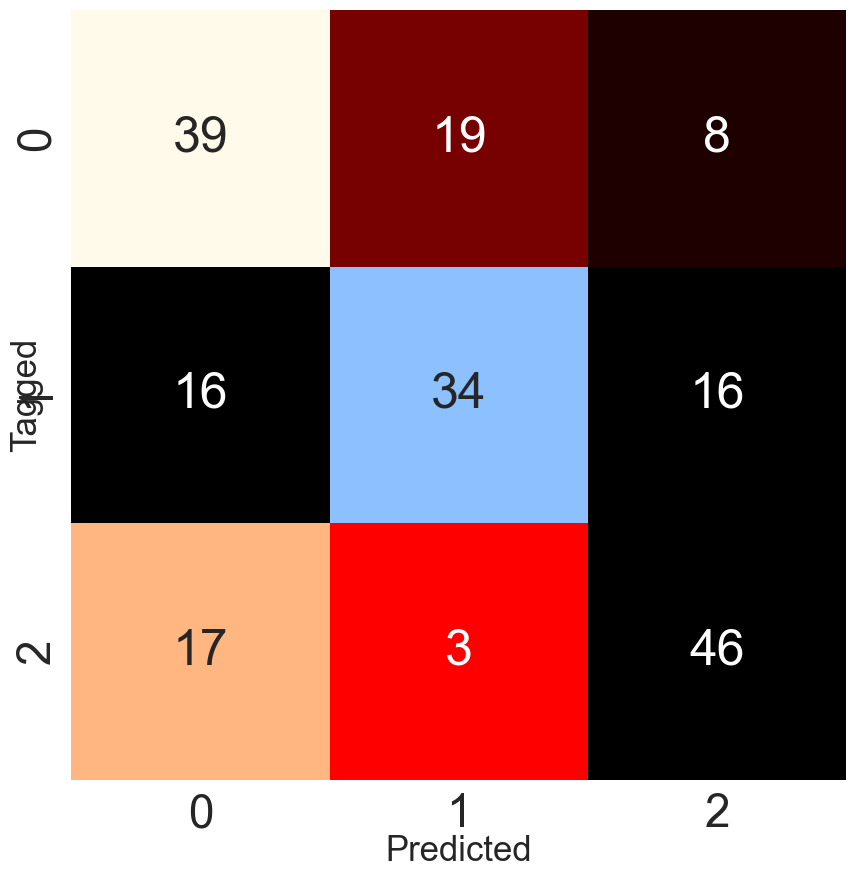

In [28]:
classifier_analysis_results = classifier_analysis(classifier, entries)
classifier_analisis_plot(classifier_analysis_results)